In [ ]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()


# Hierarchy

In [ ]:
hierarchy = pd.read_csv('test_hierarchy_agg.csv')
hierarchy

,n_hierarchy,min,mean,std,max
0,2,0.001106,0.001667,0.001639,0.006601
1,3,0.000837,0.000882,0.000055,0.001033
2,4,0.000815,0.000863,0.000073,0.001059
3,5,0.000810,0.000848,0.000041,0.000942
4,6,0.000800,0.000851,0.000069,0.001046
...,...,...,...,...,...
9992,9994,0.028625,0.029550,0.000867,0.031607
9993,9995,0.028927,0.030357,0.001174,0.033073
9994,9996,0.029344,0.031095,0.001446,0.033942
9995,9997,0.029446,0.031309,0.001421,0.033898


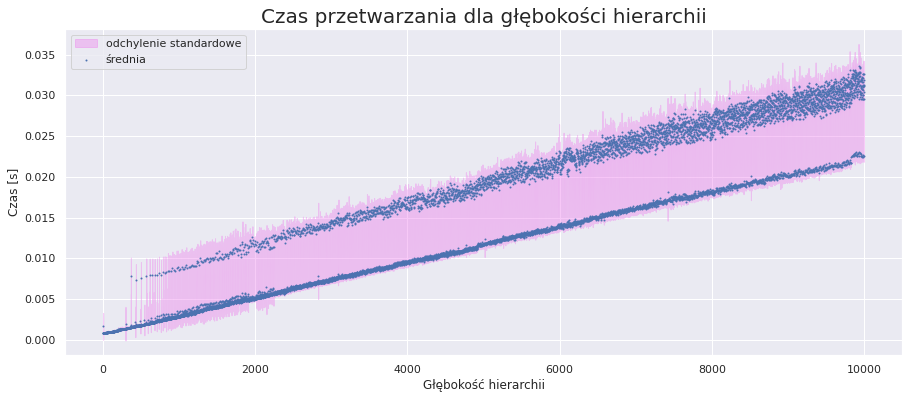

In [ ]:
# Define x, y
x = hierarchy['n_hierarchy']
y = hierarchy['mean']
std = hierarchy['std']

# Plot
plt.figure(figsize=(15,6))
plt.title('Czas przetwarzania dla głębokości hierarchii', fontsize=20)
plt.xlabel('Głębokość hierarchii')
plt.ylabel('Czas [s]')
plt.fill_between(x, y-std, y+std, alpha=0.4, color='violet', label='odchylenie standardowe')
plt.scatter(x, y, s=1, label='średnia')
plt.legend(loc='best')
plt.savefig('hierarchy.png', dpi=300)
plt.show()

# Vertical

In [ ]:
vertical = pd.read_csv('test_vertical_agg.csv')
vertical

,n_rules,max,min,mean,std
0,1,0.026344,0.001435,0.019536,0.006776
1,2,0.004159,0.000842,0.001497,0.000933
2,4,0.001353,0.000787,0.000974,0.000192
3,8,0.001141,0.000808,0.000947,0.000143
4,16,0.003508,0.000849,0.001207,0.000784
5,32,0.004071,0.000807,0.001437,0.000920
6,64,0.001316,0.000777,0.000953,0.000180
7,128,0.001144,0.000802,0.000923,0.000147
8,256,0.003679,0.000845,0.001468,0.000944
9,512,0.001534,0.000917,0.001112,0.000203


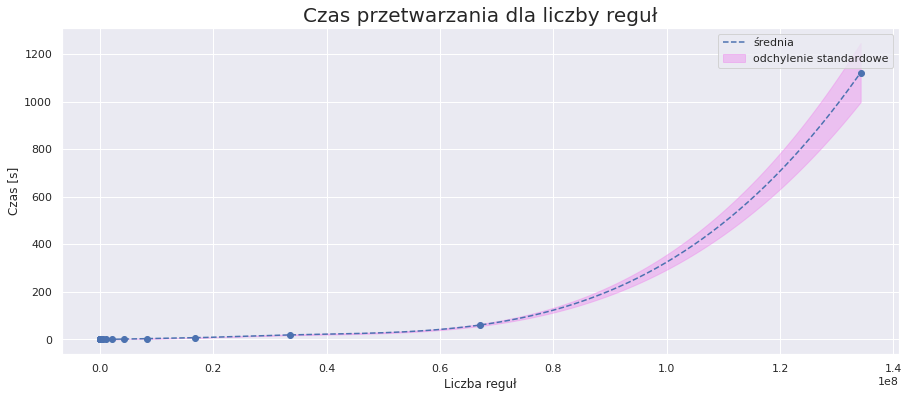

In [ ]:
import numpy as np
# Define x, y, and xnew to resample at
x = vertical['n_rules']
y = vertical['mean']
std = vertical['std']
xnew = np.linspace(x.min(), x.max(), num=500, endpoint=True)

# Define interpolators
y_cubic = interp1d(x, y, kind='cubic')
yl_cubic = interp1d(x, y-std, kind='cubic')
yh_cubic = interp1d(x, y+std, kind='cubic')


# Plot
plt.figure(figsize=(15,6))
plt.title('Czas przetwarzania dla liczby reguł', fontsize=20)
plt.xlabel('Liczba reguł')
plt.ylabel('Czas [s]')
plt.fill_between(xnew, yl_cubic(xnew), yh_cubic(xnew), alpha=0.4, color='violet', label='odchylenie standardowe')
plt.scatter(x, y)
plt.plot(xnew, y_cubic(xnew), '--', label='średnia')
plt.legend(loc='best')
plt.savefig('vertical.png', dpi=300)
plt.show()

# Horizontal

In [ ]:
horizontal = pd.read_csv('test_horizontal_agg.csv')
horizontal

,n_items,max,min,mean,std
0,1,0.006312,0.001309,0.003567,0.001472
1,2,0.001616,0.000926,0.001021,0.000205
2,3,0.001506,0.000971,0.001093,0.000162
3,4,0.004652,0.001144,0.001515,0.001044
4,5,0.002485,0.001580,0.001788,0.000285
5,6,0.004191,0.002864,0.003247,0.000510
6,7,0.009095,0.006905,0.007454,0.000671
7,8,0.029784,0.019550,0.021253,0.003117
8,9,0.092267,0.057278,0.062233,0.010449
9,10,0.344405,0.176523,0.198965,0.049553


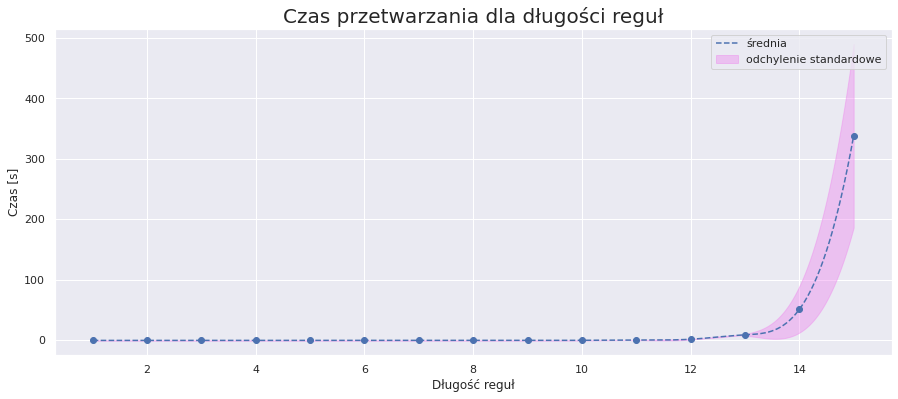

In [ ]:
# Define x, y, and xnew to resample at
x = horizontal['n_items']
y = horizontal['mean']
std = horizontal['std']
xnew = np.linspace(x.min(), x.max(), num=500, endpoint=True)

# Define interpolators
y_cubic = interp1d(x, y, kind='cubic')
yl_cubic = interp1d(x, y-std, kind='cubic')
yh_cubic = interp1d(x, y+std, kind='cubic')


# Plot
plt.figure(figsize=(15,6))
plt.title('Czas przetwarzania dla długości reguł', fontsize=20)
plt.xlabel('Długość reguł')
plt.ylabel('Czas [s]')
plt.fill_between(xnew, yl_cubic(xnew), yh_cubic(xnew), alpha=0.4, color='violet', label='odchylenie standardowe')
plt.scatter(x, y)
plt.plot(xnew, y_cubic(xnew), '--', label='średnia')
plt.legend(loc='best')
plt.savefig('horizontal.png', dpi=300)
plt.show()